# **HumanActivityRecognition**

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

**How data was recorded**

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.

prefix 't' in those metrics denotes time.

suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

**Feature names**

These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings.

From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.

In our dataset, each datapoint represents a window with different readings

The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz.

After that, the body linear acceleration and angular velocity were derived in time to obtian jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).

The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag.

Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMag etc.,.

These are the signals that we got so far.
tBodyAcc-XYZ

* tGravityAcc-XYZ
* tBodyAccJerk-XYZ
* tBodyGyro-XYZ
* tBodyGyroJerk-XYZ
* tBodyAccMag
* tGravityAccMag
* tBodyAccJerkMag
* tBodyGyroMag
* tBodyGyroJerkMag
* fBodyAcc-XYZ
* fBodyAccJerk-XYZ
* fBodyGyro-XYZ
* fBodyAccMag
* fBodyAccJerkMag
* fBodyGyroMag
* fBodyGyroJerkMag

We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.
* mean(): Mean value
* std(): Standard deviation
* mad(): Median absolute deviation
* max(): Largest value in array
* min(): Smallest value in array
* sma(): Signal magnitude area
* energy(): Energy measure. Sum of the squares divided by the number of values.
* iqr(): Interquartile range
* entropy(): Signal entropy
* arCoeff(): Autorregresion coefficients with Burg order equal to 4
* correlation(): correlation coefficient between two signals
* maxInds(): index of the frequency component with largest magnitude
* meanFreq(): Weighted average of the frequency components to obtain a mean frequency
* skewness(): skewness of the frequency domain signal
* kurtosis(): kurtosis of the frequency domain signal
* bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
* angle(): Angle between to vectors.

We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable' `

* gravityMean
* tBodyAccMean
* tBodyAccJerkMean
* tBodyGyroMean
* tBodyGyroJerkMean
* Y_Labels(Encoded)

In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

WALKING as 1
WALKING_UPSTAIRS as 2
WALKING_DOWNSTAIRS as 3
SITTING as 4
STANDING as 5
LAYING as 6

Train and test data were saperated

The readings from 70% of the volunteers were taken as trianing data and remaining 30% subjects recordings were taken for test data

Data Size :
27 MB

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs
    3. WalkingDownstairs
    4. Standing
    5. Sitting
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping.

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.

## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [ ]:
import numpy as np
import pandas as pd

features = list()
# get the features from the file features.txt
with open('./features.txt') as f:
  features = [line.split()[1] for line in f.readlines()]

print('number of features {}'.format(len(features)))

number of features 561


In [ ]:
#get data from text file to pandas dataframe
X_train = pd.read_csv('./X_train.txt',delim_whitespace=True, header = None)
# assigning feature names
X_train.columns = features
#add subject column to dataframe
subject_data = pd.read_csv('./subject_train.txt',header = None) # Read the subject data
X_train['subject'] = subject_data.iloc[:, 0]

y_train = pd.read_csv('./y_train.txt', header = None,names=['Activity'])
y_train_labels = y_train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
#put all the training data in single data frame
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
train.shape

(7352, 564)

In [ ]:
X_test = pd.read_csv('./X_test.txt',delim_whitespace=True, header = None)
X_test.columns = features
subject_data = pd.read_csv('./subject_test.txt',header = None)
X_test['subject'] = subject_data.iloc[:, 0]

y_test = pd.read_csv('./y_test.txt', header = None,names=['Activity'])
y_test_labels = y_test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [ ]:
test.shape

(2947, 564)

In [ ]:
# checking for duplicates
print('number of duplicates : {}'.format(train.duplicated().sum()))
print('number of duplicates : {}'.format(test.duplicated().sum()))

number of duplicates : 0
number of duplicates : 0


In [ ]:
#checking for null values
print('number of null values : {}'.format(train.isnull().values.sum()))
print('number of null values : {}'.format(test.isnull().values.sum()))

number of null values : 0
number of null values : 0


In [ ]:
#check for data imbalance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

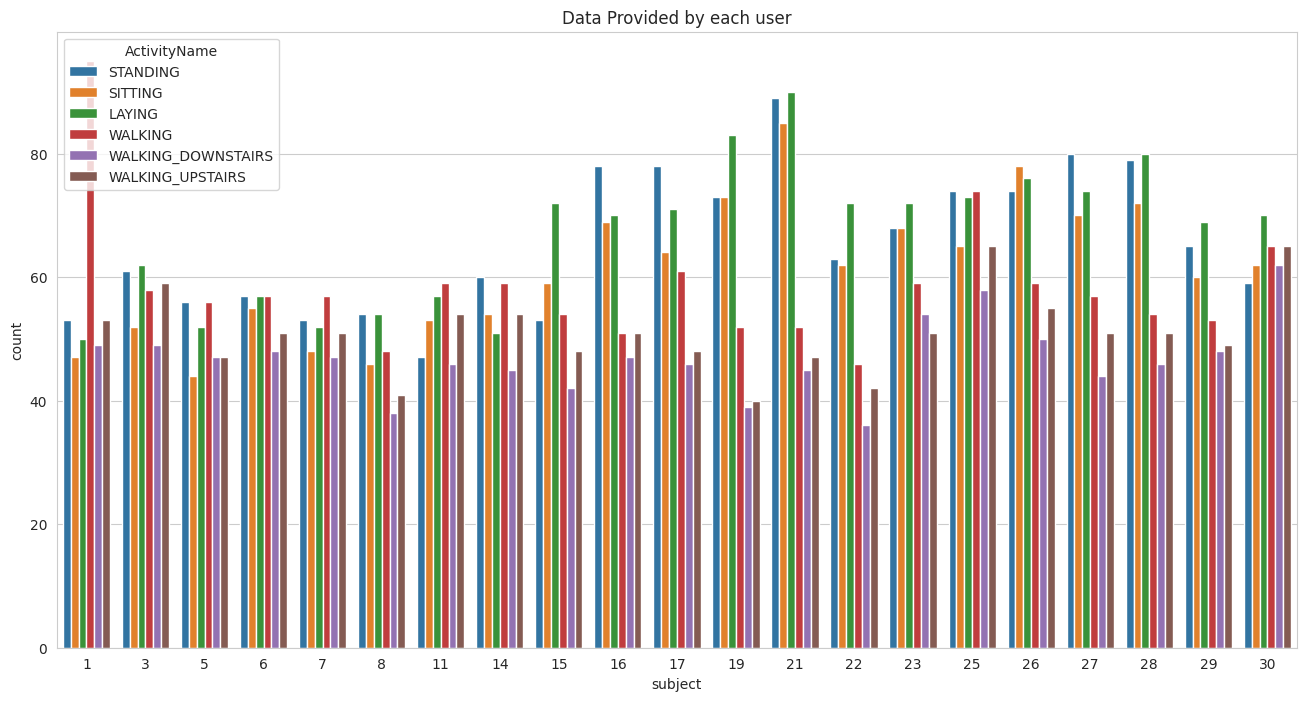

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data Provided by each user')
sns.countplot(x='subject',hue = 'ActivityName',data = train)
plt.show()

we almost got the same number of readings for all the subjects

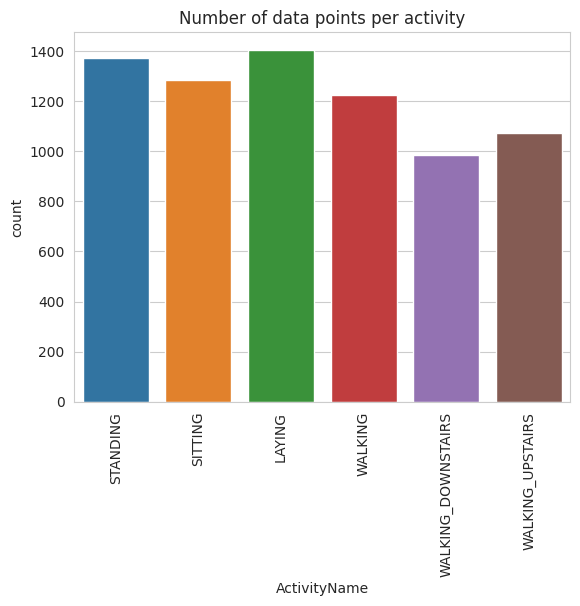

In [ ]:
plt.title('Number of data points per activity')
sns.countplot(x='ActivityName',data = train,hue='ActivityName')
plt.xticks(rotation = 90)
plt.show()

we almost got same no of data points for activities

so our data is well balanced

In [ ]:
# cleaning the column names
columns =train.columns
columns = columns.str.replace('()','')
columns = columns.str.replace('-','')
columns = columns.str.replace(',','')

train.columns = columns
test.columns = columns

train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angle(tBodyAccMeangravity)', 'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

**EDA**


+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

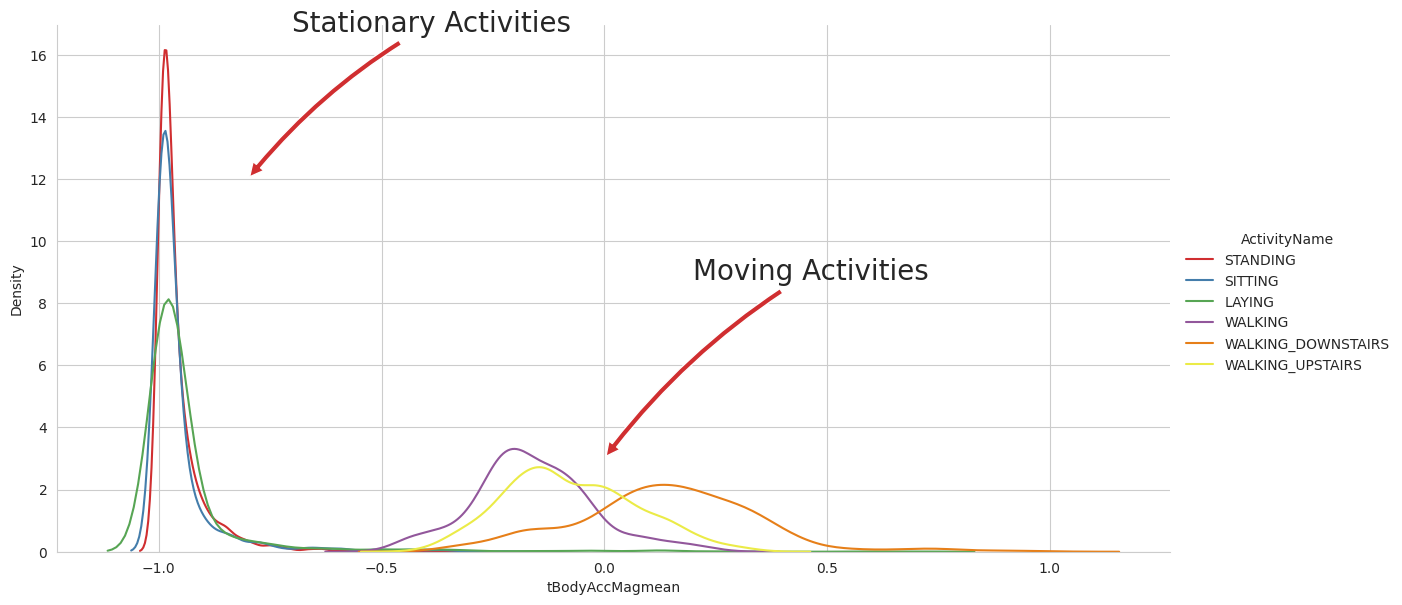

In [ ]:
sns.set_palette('Set1',desat=.80)
FacetGrid = sns.FacetGrid(train,hue='ActivityName',height=6,aspect=2)
FacetGrid.map(sns.kdeplot,'tBodyAccMagmean')
FacetGrid.add_legend()
plt.annotate("Stationary Activities", xy=(-0.8, 12), xytext=(-0.7, 17), size=20,\
             va='center', ha='left',\
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

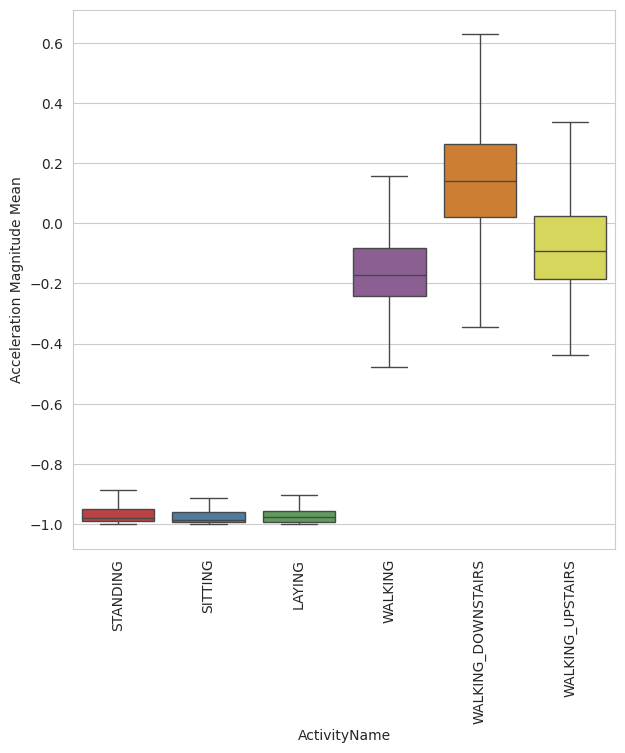

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName',y='tBodyAccMagmean',data=train,showfliers=False,hue='ActivityName')
plt.xticks(rotation=90)
plt.ylabel('Acceleration Magnitude Mean')
plt.show()

We can see that the magnitude of the acceleration can separate the stationary and dynamic activities
__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

In [ ]:
# now we will check for the another component  Gravity acceleration components

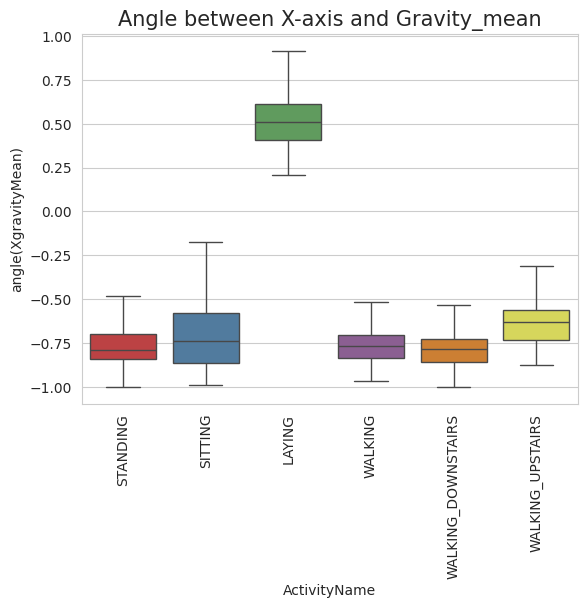

In [ ]:
sns.boxplot(x='ActivityName',y='angle(XgravityMean)',data=train,hue='ActivityName',showfliers=False)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=90)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

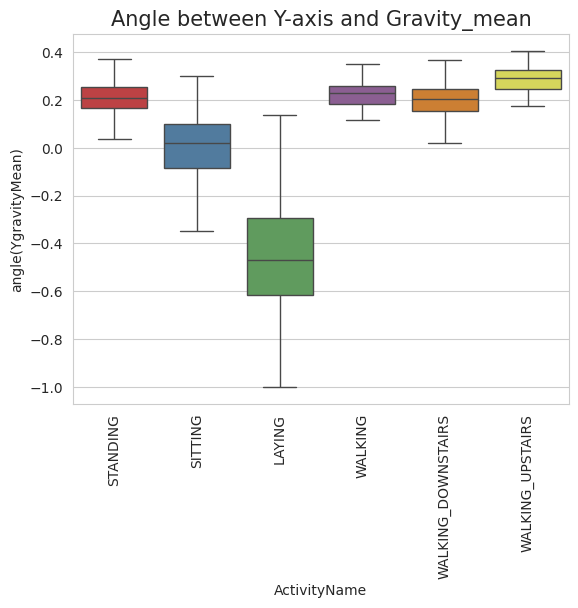

In [ ]:
sns.boxplot(x='ActivityName',y='angle(YgravityMean)',data=train,hue='ActivityName',showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=90)
plt.show()

we will apply t-SNE on the data

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data,y_data, perplexities,n_iter=1000,img_name_prefix='t-sne'):
  for index,perplexity in enumerate(perplexities):
    #peform t-sne
    print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
    X_reduced = TSNE(n_components=2,perplexity=perplexity,n_iter=n_iter).fit_transform(X_data)
    print('Done......')
    #plot the data
    print('creating plot for this tsne')
    df = pd.DataFrame()
    df['y'] = y_data
    df['comp-1'] = X_reduced[:,0]
    df['comp-2'] = X_reduced[:,1]
    sns.scatterplot(x='comp-1',y='comp-2',hue='y',data=df).set_title('t-sne with perplexity {}'.format(perplexity))
    plt.show()



performing tsne with perplexity 5 and with 1000 iterations at max
Done......
creating plot for this tsne


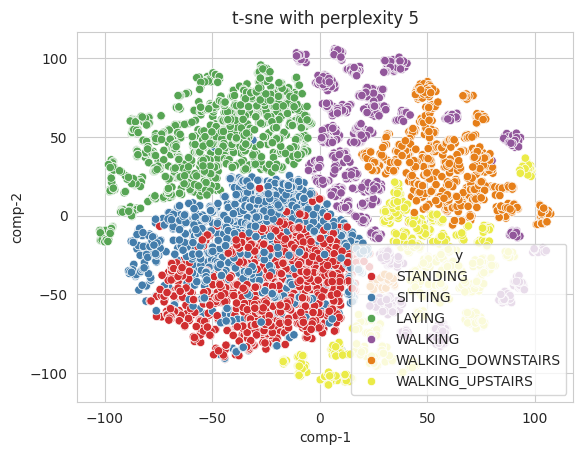


performing tsne with perplexity 50 and with 1000 iterations at max
Done......
creating plot for this tsne


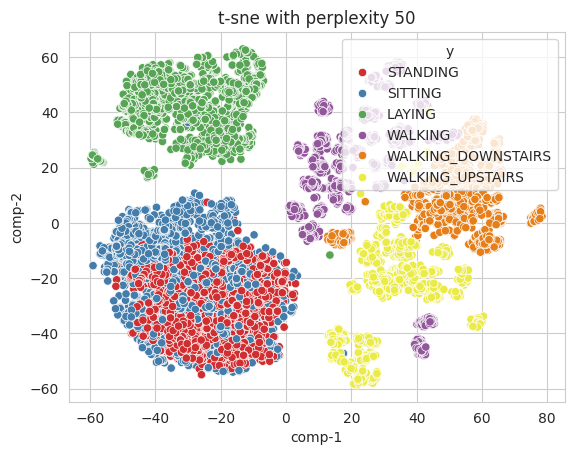


performing tsne with perplexity 100 and with 1000 iterations at max
Done......
creating plot for this tsne


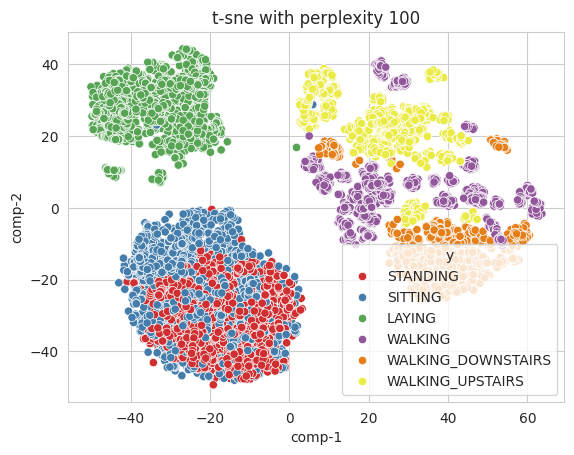

In [ ]:
X_tsne = train.drop(['Activity','subject','ActivityName'],axis=1)
y_tsne = train['ActivityName']
perplexities = [5,50,100]
perform_tsne(X_tsne,y_tsne,perplexities)

We can see it is difficult to diffrentiate between standing and Sitting

**Now we will apply some Classical models for classification**

In [ ]:
X_train = train.drop(['Activity','subject','ActivityName'],axis=1)
y_train = train['ActivityName']
X_test = test.drop(['Activity','subject','ActivityName'],axis=1)
y_test = test['ActivityName']

In [ ]:
print('X_Train Shape : {}'.format(X_train.shape))
print('X_Test Shape : {}'.format(X_test.shape))

X_Train Shape : (7352, 561)
X_Test Shape : (2947, 561)


In [ ]:
labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [ ]:
# now we will create a function to calculate the confusion matrix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Blues'):
    """
    This function plots the confusion matrix using Seaborn's heatmap.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True labels.

    y_pred : array-like of shape (n_samples,)
        Predicted labels.

    classes : list of str
        List of class names.

    normalize : bool, default=False
        Whether to normalize the confusion matrix.

    title : str, default='Confusion matrix'
        Title for the plot.

    cmap : str or Colormap, default='Blues'
        Colormap to be used for the heatmap.
    """
    # Normalize the confusion matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a DataFrame for the confusion matrix for better visualization
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)

    # Plot the heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_df, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap)

    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
def perform_model(model,X_train,y_train,X_test,y_test,class_labels,cm_normalize=True,\
                  print_cm = True, cm_cmap='Greens'):
  #storing results at various phases
  results =dict()
  train_start_time = datetime.now()
  model.fit(X_train,y_train)
  train_end_time = datetime.now()
  results['training_time']=train_end_time-train_start_time
  print('Training Time : {}'.format(results['training_time']))
  test_start_time = datetime.now()
  y_pred = model.predict(X_test)
  test_end_time = datetime.now()
  results["testing_time"] = test_end_time - test_start_time
  print('Testing Time : {}'.format(results['testing_time']))
  results['accuracy'] = accuracy_score(y_test,y_pred)
  print('Accuracy : {}'.format(results['accuracy']))
  cm = confusion_matrix(y_test,y_pred)
  results['confusion_matrix'] = cm
  if print_cm:
    print('Confusion Matrix')
    print(cm)
  #plotting the confusion matrix
  plot_confusion_matrix(cm,class_labels,normalize=cm_normalize,cmap=cm_cmap)
  #getting classification report
  classification_report_str = classification_report(y_test,y_pred)
  results['classification_report'] = classification_report_str
  print('Classification Report')
  print(classification_report_str)
  results['model'] = model
  return results

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


**Linear Model**

In [ ]:
# Logistic Regression with Grid Search
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Training Time : 0:04:23.460132
Testing Time : 0:00:00.006918
Accuracy : 0.9548693586698337
Confusion Matrix
[[533   0   4   0   0   0]
 [  1 428  60   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   1   7 396  16]
 [  0   0   0  24   1 446]]


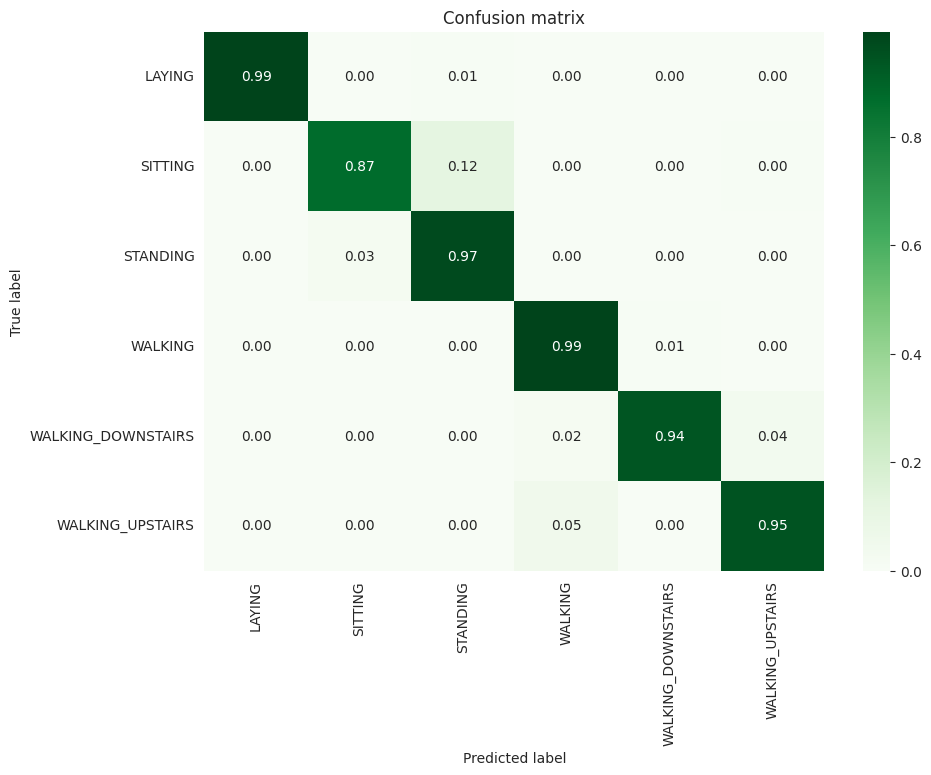

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.95       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



In [ ]:
#Start Grid Search
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression(max_iter=3000)
log_reg_grid = GridSearchCV(log_reg,param_grid=parameters,cv=3,verbose=1,n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid,X_train_scaled,y_train,X_test_scaled,y_test,class_labels = labels)

In [ ]:
# observe the attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1, max_iter=3000)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9387944390322428



**Linear SVC with grid search**

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Time : 0:00:58.446162
Testing Time : 0:00:00.020766
Accuracy : 0.9670851713607058
Confusion Matrix
[[537   0   0   0   0   0]
 [  2 429  57   0   0   3]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


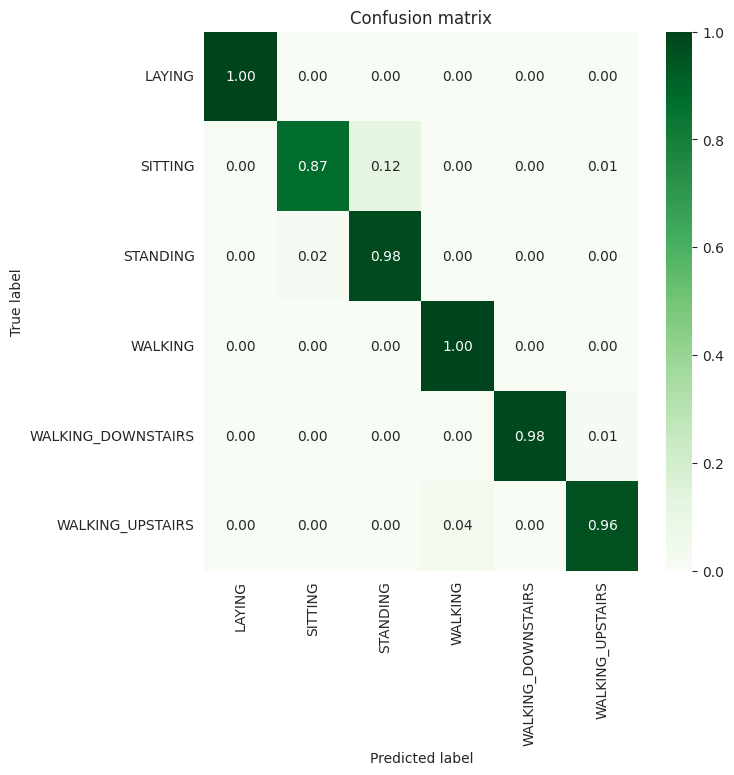

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [ ]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc,param_grid=parameters,cv=3,verbose=1,n_jobs=-1)
lr_svc_grid_results = perform_model(lr_svc_grid,X_train,y_train,X_test,y_test,class_labels = labels)

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9462756004074416



**kernel SVM with grid search**

Training Time : 0:06:52.279568
Testing Time : 0:00:01.495256
Accuracy : 0.9626739056667798
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


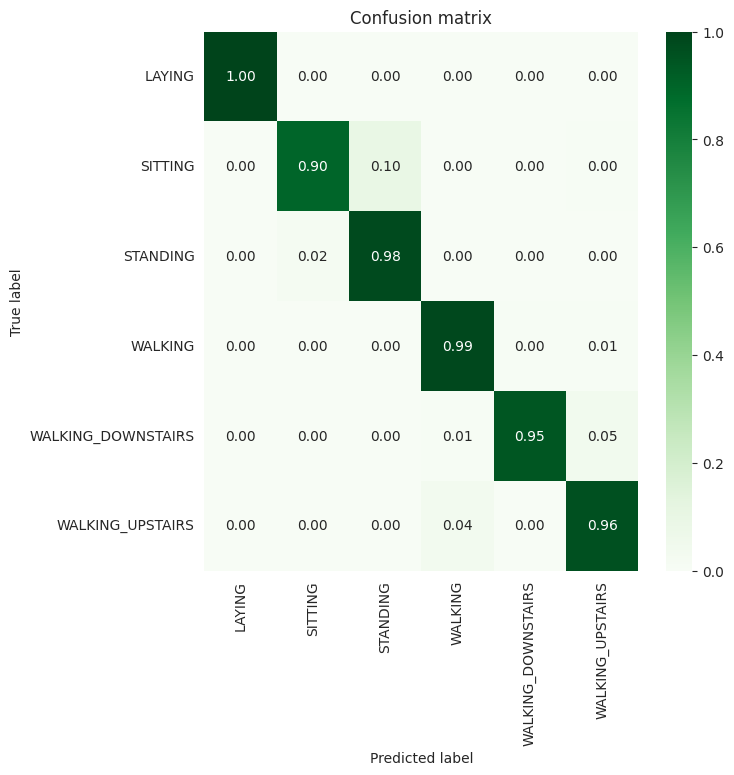

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



**Decision Tree With grid search**

Training Time : 0:00:53.318821
Testing Time : 0:00:00.014854
Accuracy : 0.8649474041398032
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  17 341  62]
 [  0   0   0  73  24 374]]


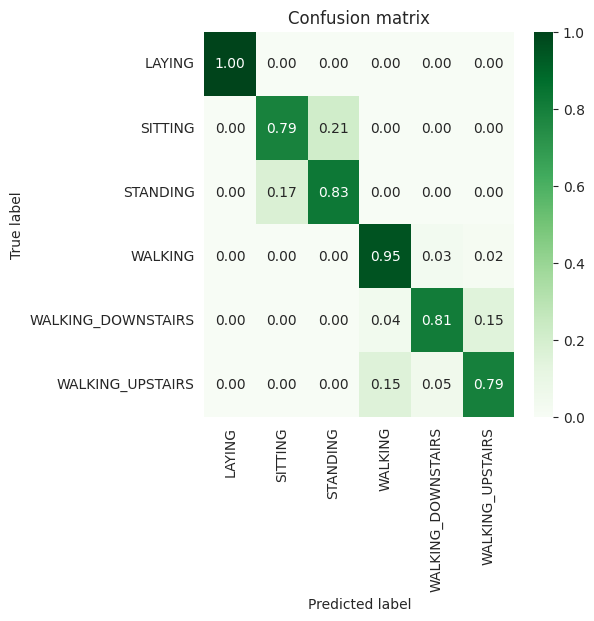

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.81      0.85       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

          accuracy                           0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=7)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

**Random Forest**

Training Time : 0:27:59.640169
Testing Time : 0:00:00.085715
Accuracy : 0.9226331862911435
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 434  57   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 483  10   3]
 [  0   0   0  23 353  44]
 [  0   0   0  44   6 421]]


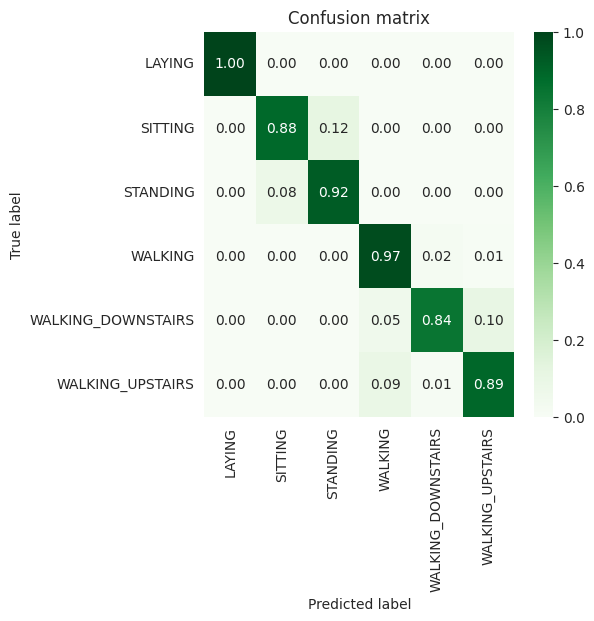

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.88      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.84      0.89       420
  WALKING_UPSTAIRS       0.90      0.89      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=11, n_estimators=150)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 11, 'n_estimators': 150}

---------------------------------
|   No of CrossValidation sets   |
---------

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

**GradientBoosting With Grid search CV**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

**Comparing All the models**

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))